# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 2381 Долотов Никита Андреевич и Зазуля Илья Анатольевич. Вариант №5.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

### Дискретное преобразование Фурье

Для анализа частотного состава используется дискретное преобразование Фурье, позволяющее перейти от временной последовательности к набору спектральных коэффициентов:

$$
X[k]=\sum_{n=0}^{N-1} s[n] e^{-i\frac{2\pi}{N}kn}.
$$

Параметр $k$ определяет номер дискретной частоты, а сама частота связана с ним соотношением $\omega_k=\frac{2\pi k}{N}$.

### Линейные нерекурсивные фильтры

В работе применяются фильтры конечной длины, выход которых выражается свёрткой входного сигнала с набором коэффициентов $h_k$:

$$
y[n]=\sum_{k=-m}^{m} h_k s[n-k],
$$

где $2m+1$ – длина фильтра.

Частотная характеристика такого фильтра имеет вид:

$$
H(\omega)=\sum_{k=-m}^{m} h_k e^{-i\omega k}.
$$

При симметричных коэффициентах выражение упрощается за счёт того, что экспоненты взаимно компенсируются, и передаточная функция становится вещественной.

### Фильтры сглаживания

В работе рассматриваются три вида наборов коэффициентов $h_k$:

* равномерное взвешивание (скользящее среднее);
* коэффициенты, полученные при аппроксимации локального участка полиномом второй степени;
* аналогичная аппроксимация полиномом четвёртой степени.

Каждый из этих фильтров имеет собственную форму частотной характеристики, что приводит к различной степени подавления высокочастотной части спектра.

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Вычисление ДПФ
def compute_dft(x):
    return np.fft.fft(x)

# Свертка
def apply_fir(x, coeffs):
    x = np.asarray(x, dtype=float)
    coeffs = np.asarray(coeffs, dtype=float)
    y = np.convolve(x, coeffs, mode='same')
    return y

# Построение сигнала
def synthesize_signal(amplitudes, omegas, phases, t):
    A = np.asarray(amplitudes)
    w = np.asarray(omegas)
    phi = np.asarray(phases)
    t = np.asarray(t)
    return np.sum(A[:, None] * np.cos(w[:, None] * t[None, :] + phi[:, None]), axis=0)

# Вычисление частотной характеристики
def freq_response_from_coeffs(coeffs, N_freq=512):
    coeffs = np.asarray(coeffs, dtype=float)
    H = np.fft.fft(coeffs, n=N_freq)
    omega = 2 * np.pi * np.arange(N_freq) / N_freq
    return omega, H


### Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega = 0.1\pi$ Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

In [2]:
# Параметры
T = 1
num_harmonics = 11
dw = math.pi * 0.1
N = 32
t_analog_step = 0.001

random.seed(42)
np.random.seed(42)

# Амплитуды
amps = np.arange(1, 12)
np.random.shuffle(amps)
amps = amps.astype(float)
amps_norm = amps / np.sum(amps)

# Частоты
omegas = np.array([dw * i for i in range(num_harmonics)])

# Начальные фазы
phases = np.random.uniform(0.0, 0.5, size=num_harmonics)

# Временные оси
t_analog = np.arange(0, N, t_analog_step)
t_discrete = np.arange(N)

# Формирование аналогового и дискретного сигналов
s_analog = synthesize_signal(amps_norm, omegas, phases, t_analog)
s_discrete = synthesize_signal(amps_norm, omegas, phases, t_discrete)


### Задание 2

Визуализировать исходные аналоговый и дискретизированный сигналы.

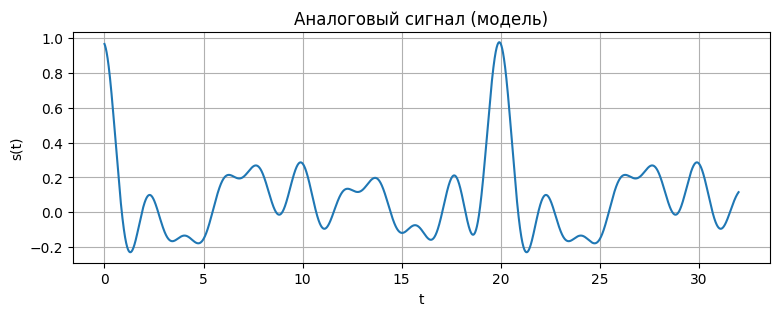

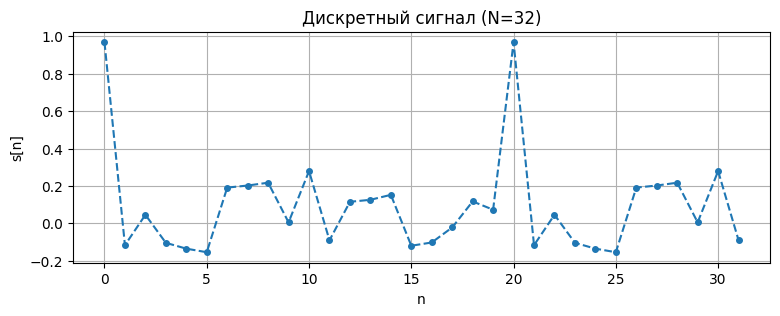

In [5]:
plt.figure(figsize=(9, 3))
plt.plot(t_analog, s_analog)
plt.title('Аналоговый сигнал (модель)')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.figure(figsize=(9, 3))
plt.plot(t_discrete, s_discrete, linestyle='--', marker='o', markersize=4)
plt.title('Дискретный сигнал (N=32)')
plt.xlabel('n')
plt.ylabel('s[n]')
plt.grid(True)
plt.show()


### Задание 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

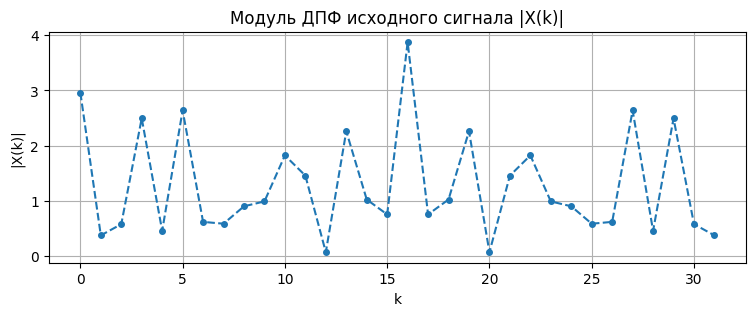

In [9]:
X = compute_dft(s_discrete)
freqs = np.fft.fftfreq(N, d=T)

plt.figure(figsize=(9,3))
plt.plot(np.arange(N), np.abs(X), linestyle='--', marker='o', markersize=4)
plt.title('Модуль ДПФ исходного сигнала |X(k)|')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.grid(True)
plt.show()


### Задание 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Формула для сглаживания прямой линией по 5 точкам:

$H_5(w) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

Формула для сглаживания прямой линией по 9 точкам:

$H_9(w) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

In [13]:
coeffs_ma5 = np.ones(5) / 5.0
coeffs_ma9 = np.ones(9) / 9.0

s_ma5 = apply_fir(s_discrete, coeffs_ma5)
s_ma9 = apply_fir(s_discrete, coeffs_ma9)


### Задание 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

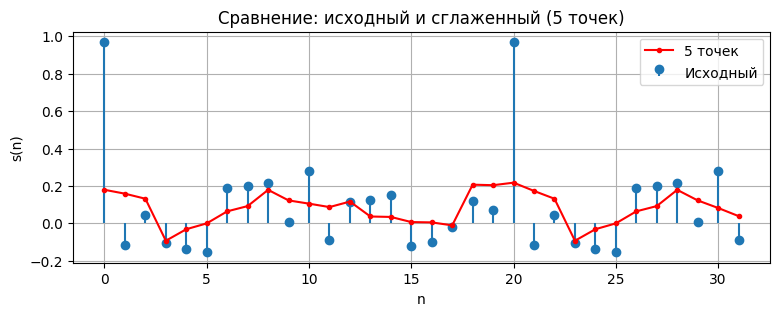

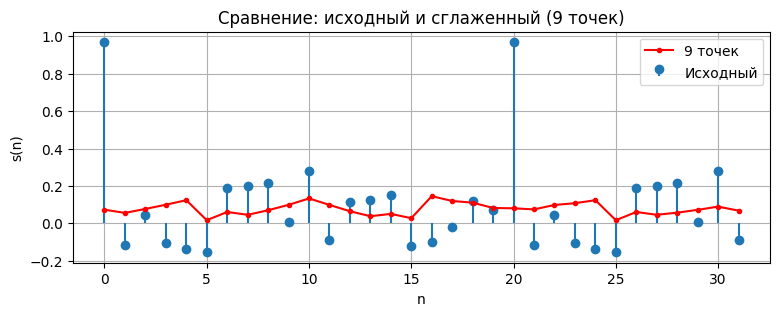

In [26]:
plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_ma5, 'r.-', label='5 точек')
plt.title('Сравнение: исходный и сглаженный (5 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_ma9, 'r.-', label='9 точек')
plt.title('Сравнение: исходный и сглаженный (9 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

### Задание 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

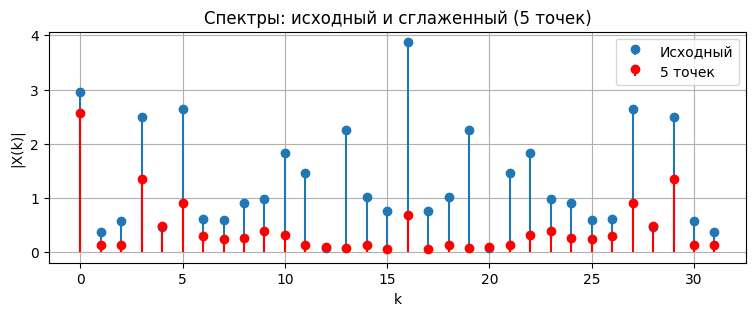

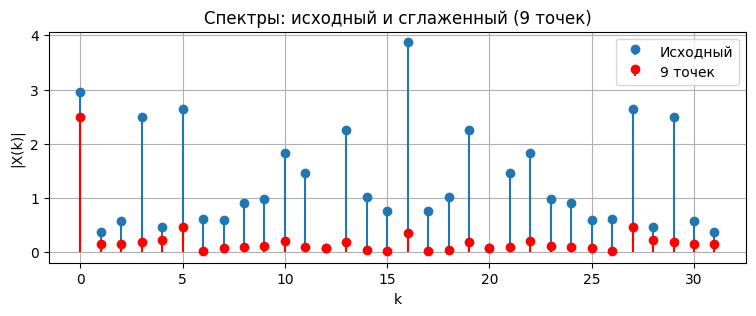

In [23]:
X_ma5 = compute_dft(s_ma5)
X_ma9 = compute_dft(s_ma9)

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_ma5), markerfmt='ro', linefmt='r-', basefmt=" ", label='5 точек')
plt.title('Спектры: исходный и сглаженный (5 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_ma9), markerfmt='ro', linefmt='r-', basefmt=" ", label='9 точек')
plt.title('Спектры: исходный и сглаженный (9 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

### Задание 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Полученные спектры показывают, что фильтр действует как фильтр низких частот: высокочастотные гармоники заметно уменьшаются, особенно при окне из 9 точек. Для 5 точек спад менее выражен, что соответствует более широкой полосе пропускания. Характер изменения спектра полностью согласуется с формой $H(\omega)$ для фильтра скользящего среднего: чем длиннее окно, тем сильнее подавление высоких частот.

### Задание 8

Повторить п. 4-7 для следующих фильтров:

  a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам;
    
  b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

### Задание 8a



Сглаживание полиномом 2-ой степени по 5 точкам:

$y_n = \frac{1}{35} (-3s_{n-2} + 12s_{n-1} + 17s_{n} + 12s_{n+1} - 3s_{n+2})$

Передаточная функция при сглаживании полиномом 2-ой степени по 5 точкам:

$H(w) = \frac{1}{35} (17 + 24cos(w) - 6cos(2w))$

Сглаживание полиномом 2-ой степени по 9 точкам:

$y_n = \frac{1}{231} (-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_{n} + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4})$

Передаточная функция при сглаживании полиномом 2-ой степени по 9 точкам:

$H(w) = \frac{1}{231} (59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w))$

In [19]:
coeffs_poly2_5 = np.array([-3, 12, 17, 12, -3], dtype=float) / 35.0
coeffs_poly2_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21], dtype=float) / 231.0

s_p2_5 = apply_fir(s_discrete, coeffs_poly2_5)
s_p2_9 = apply_fir(s_discrete, coeffs_poly2_9)

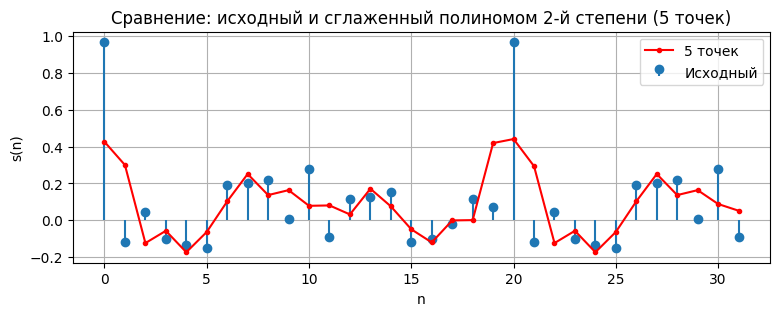

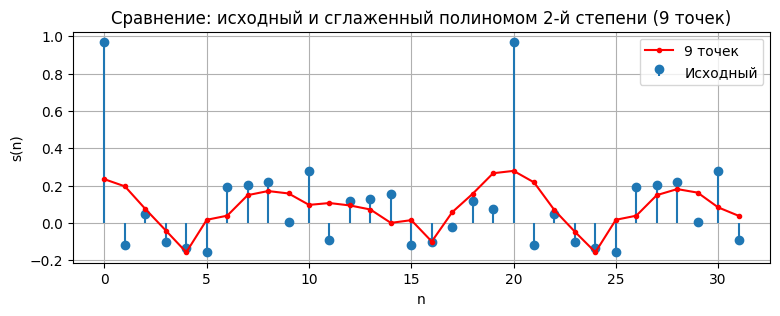

In [27]:
plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_p2_5, 'r.-', label='5 точек')
plt.title('Сравнение: исходный и сглаженный полиномом 2-й степени (5 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_p2_9, 'r.-', label='9 точек')
plt.title('Сравнение: исходный и сглаженный полиномом 2-й степени (9 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

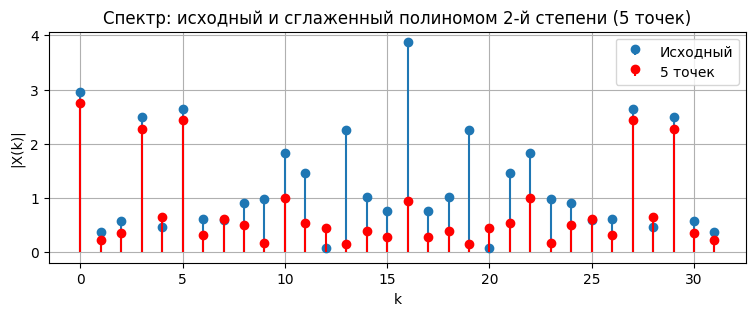

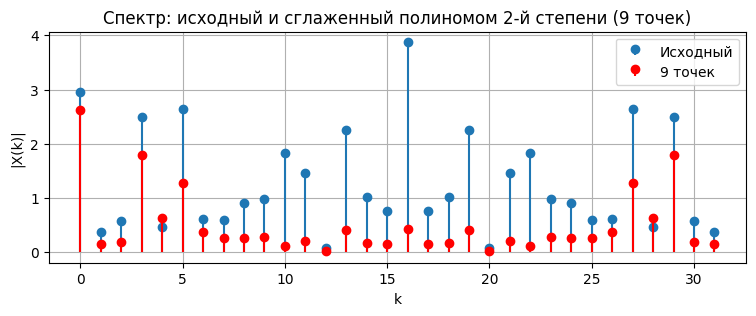

In [25]:
X_p2_5 = compute_dft(s_p2_5)
X_p2_9 = compute_dft(s_p2_9)

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_p2_5), markerfmt='ro', linefmt='r-', basefmt=" ", label='5 точек')
plt.title('Спектр: исходный и сглаженный полиномом 2-й степени (5 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_p2_9), markerfmt='ro', linefmt='r-', basefmt=" ", label='9 точек')
plt.title('Спектр: исходный и сглаженный полиномом 2-й степени (9 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

Спектры подтверждают, что фильтр второго порядка ослабляет высокие частоты мягче, чем обычное линейное сглаживание. При окне 5 точек высокочастотные компоненты частично сохраняются, при 9 точках — подавление увеличивается, но остаётся менее резким, чем у усреднения. Такое поведение соответствует $H(\omega)$ полиномиального фильтра: полоса пропускания шире при том же размере окна.

### Задание 8b

Сглаживание полиномом 4-ой степени по 7 точкам:

$y_n = \frac{1}{231} (5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_{n} + 75s_{n+1} - 30s_{n+2} + 5s_{n+3})$

Передаточная функция при сглаживании полиномом 4-ой степени по 7 точкам:

$H(w) = \frac{1}{231} (131 + 150cos(w) - 60cos(2w) + 10cos(3w))$

Сглаживание полиномом 4-ой степени по 11 точкам:

$y_n = \frac{1}{429} (18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_{n} + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5})$

Передаточная функция при сглаживании полиномом 4-ой степени по 11 точкам:

$H(w) = \frac{1}{429} (143 + 240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w))$

In [28]:
coeffs_poly4_7 = np.array([5, -30, 75, 131, 75, -30, 5], dtype=float) / 231.0
coeffs_poly4_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18], dtype=float) / 429.0

s_p4_7 = apply_fir(s_discrete, coeffs_poly4_7)
s_p4_11 = apply_fir(s_discrete, coeffs_poly4_11)

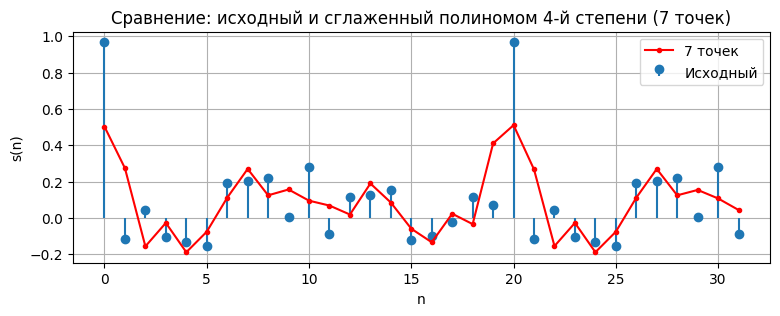

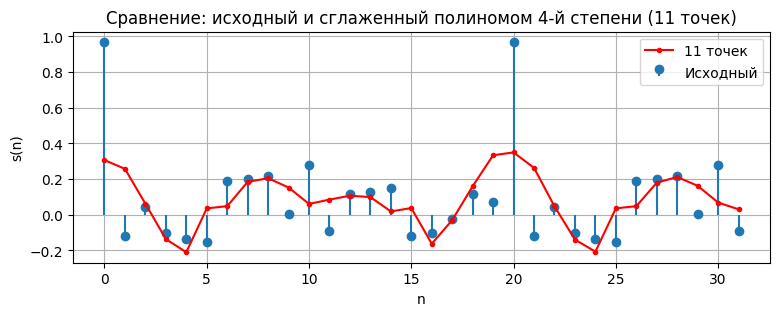

In [29]:
plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_p4_7, 'r.-', label='7 точек')
plt.title('Сравнение: исходный и сглаженный полиномом 4-й степени (7 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(t_discrete, s_discrete, basefmt=" ", label='Исходный')
plt.plot(t_discrete, s_p4_11, 'r.-', label='11 точек')
plt.title('Сравнение: исходный и сглаженный полиномом 4-й степени (11 точек)')
plt.xlabel('n')
plt.ylabel('s(n)')
plt.legend()
plt.grid(True)
plt.show()

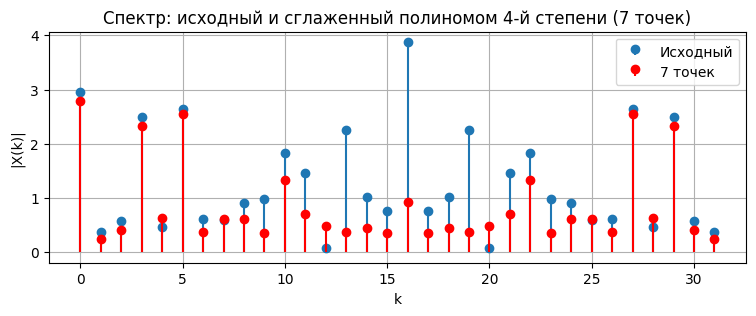

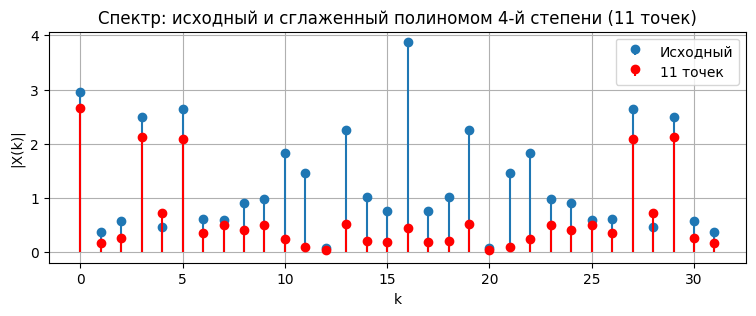

In [30]:
X_p4_7 = compute_dft(s_p4_7)
X_p4_11 = compute_dft(s_p4_11)

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_p4_7), markerfmt='ro', linefmt='r-', basefmt=" ", label='7 точек')
plt.title('Спектр: исходный и сглаженный полиномом 4-й степени (7 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,3))
plt.stem(np.arange(N), np.abs(X), basefmt=" ", label='Исходный')
plt.stem(np.arange(N), np.abs(X_p4_11), markerfmt='ro', linefmt='r-', basefmt=" ", label='11 точек')
plt.title('Спектр: исходный и сглаженный полиномом 4-й степени (11 точек)')
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.legend()
plt.grid(True)
plt.show()

Фильтр четвёртого порядка сохраняет низкочастотные гармоники почти неизменными, что видно по спектру. Ослабление проявляется в основном на высоких частотах, особенно при 11 точках. Такая форма спектра согласуется с $H(\omega)$: полиномиальные фильтры более высокого порядка имеют ещё более широкую полосу пропускания и сглаживают сигнал минимально в полезной области.

## Выводы

В ходе лабораторной работы был сформирован дискретный сигнал, получен его спектр и исследован эффект различных нерекурсивных фильтров сглаживания. Анализ показал, что все применённые методы ведут себя как фильтры нижних частот, однако степень подавления высокочастотных компонент у них различается. Линейное сглаживание заметно уменьшает амплитуды высоких частот и при увеличении окна существенно искажает форму сигнала. Фильтры на основе полинома второй степени действуют мягче: они пропускают большую часть низкочастотной области и изменяют сигнал менее значительно при тех же размерах окна. Фильтры четвёртой степени проявляют ещё более широкую полосу пропускания и почти не затрагивают полезную часть спектра, подавляя в основном наиболее высокие частоты.

Проведённый анализ подтверждает соответствие полученных спектров теоретическим частотным характеристикам $H(\omega)$. Увеличение числа точек сглаживания приводит к более узкой полосе пропускания и сильному подавлению высоких частот, тогда как повышение степени полинома делает фильтр более «прозрачным» для исходного сигнала.